#### Steve

**Please investigate using a weather API or some other source for gethering historic weather conditions for the date ranges in the data.**

Sample link:
https://www.timeanddate.com/weather/usa/boston/historic?month=10&year=2016

**Or investigate total trips over the course of several selected weeks by day of the week, where 'stoptime' is the target.**

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#import sqlite3
from scipy import stats
from datetime import datetime


In [4]:
hubway_csv = pd.read_csv('./database/hubway_final.csv')
hubway_df = pd.DataFrame(hubway_csv)
hubway_df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,end station category,start station category,day_of_week
0,0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,277,Subscriber,1984,1,4,5,Thurs
1,1,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1307,Subscriber,1987,1,4,5,Thurs
2,2,580,2015-01-04 14:29:05,2015-01-04 14:38:45,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,673,Subscriber,1991,1,4,5,Sun
3,3,754,2015-01-08 16:17:04,2015-01-08 16:29:39,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1092,Customer,1961,2,4,5,Thurs
4,4,667,2015-01-10 11:40:49,2015-01-10 11:51:57,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,772,Subscriber,1980,1,4,5,Sat


In [8]:
#hubway_df.info()

In [6]:
hubway_df['starttime'] = pd.to_datetime(hubway_df.starttime)
#hubway_df.dtypes
hubway_df['stoptime'] = pd.to_datetime(hubway_df.stoptime)
hubway_df.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
end station category                int64
start station category              int64
day_of_week                        object
dtype: object

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


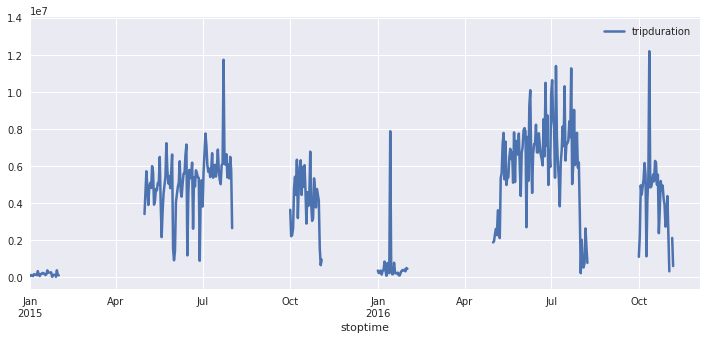

In [7]:
trp_dur = hubway_df.drop(['Unnamed: 0','starttime', 'start station name', 'start station id',
                            'start station latitude',
                            'start station longitude', 'end station name', 
                            'end station id',
                            'end station latitude',
                            'end station longitude', 
                            'bikeid', 'usertype',
                            'birth year', 'gender', 
                            'end station category',
                            'start station category', 'day_of_week'], axis=1)
c = trp_dur.set_index('stoptime')
d = c.resample('D').sum()
d.plot(lw=2.5, figsize=(12,5))

**Note:** I already confirmed that the spikes in July 2015, January 2016, and October 2016 are outliers. This is for total trip duration over time. I'd rather see number of trips per day to avoid the problem.